# Titanic: Machine Learning from Disaster

**Defining the problem statement:**
The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

# Data
Dataset can be downloaded from https://www.kaggle.com/c/titanic/data

1. Survived: 0 = No, 1 = Yes
2. pclass: Ticket class 1 = 1st, 2 = 2nd, 3 = 3rd
3. sibsp: # of siblings / spouses aboard Titanic
4. parch: # of parents / children aboard Titanic
5. ticket: Ticket number
6. cabin: Cabin number
7. embarked: Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton

In [610]:
import seaborn as sns
import numpy as np
import pandas as pd


from matplotlib import pyplot as plt
from matplotlib import style
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, KFold
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
import xgboost as xgb


# Exploring the data

In [523]:
data = pd.read_csv('train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [524]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [525]:
data.shape

(891, 12)

In [526]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [527]:
# DataFrame of column name with number of null values present
total = data.isnull().sum().sort_values()
percent = total / data.isnull().count().sort_values()
pd.concat([total,percent],axis = 1,keys = ['Count','%'])

,Count,%
PassengerId,0,0.000000
Survived,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
SibSp,0,0.000000
Parch,0,0.000000
Ticket,0,0.000000
Fare,0,0.000000
Embarked,2,0.002245


We can see that Age value is missing for many rows.

Out of 891 rows, the Age value is present only in 714 rows.

Similarly, Cabin values are also missing in many rows. Only 204 out of 891 rows have Cabin va.lues

In [528]:
pd.crosstab(data.Sex,data.Survived)

Survived,0,1
Sex,,
female,81,233
male,468,109


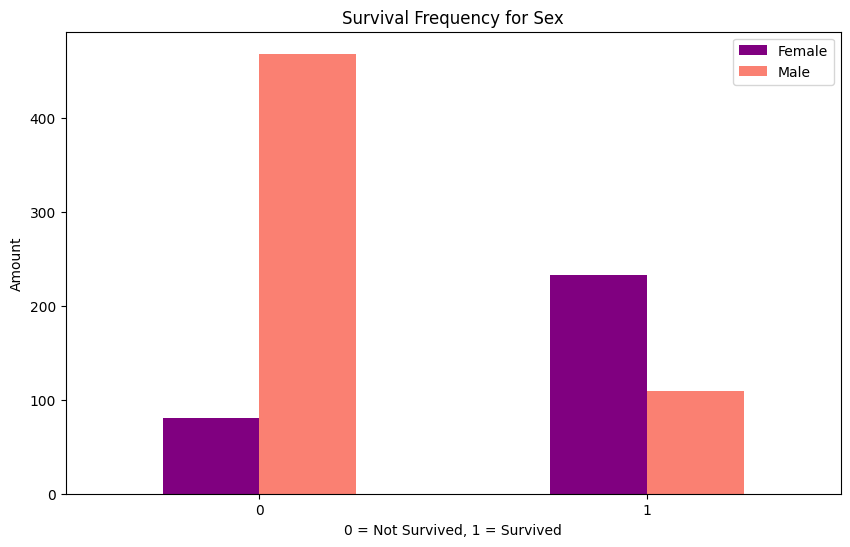

In [529]:
data# Visualize the crosstab dataframe
pd.crosstab(data.Survived, data.Sex).plot(kind="bar", 
                                    figsize=(10,6), 
                                    color=["purple","salmon"]);
plt.title("Survival Frequency for Sex")
plt.xlabel("0 = Not Survived, 1 = Survived")
plt.ylabel("Amount")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0);

The Chart confirms `Women` more likely survivied than `Men`

In [530]:
pd.crosstab(data.Pclass,data.Survived)

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


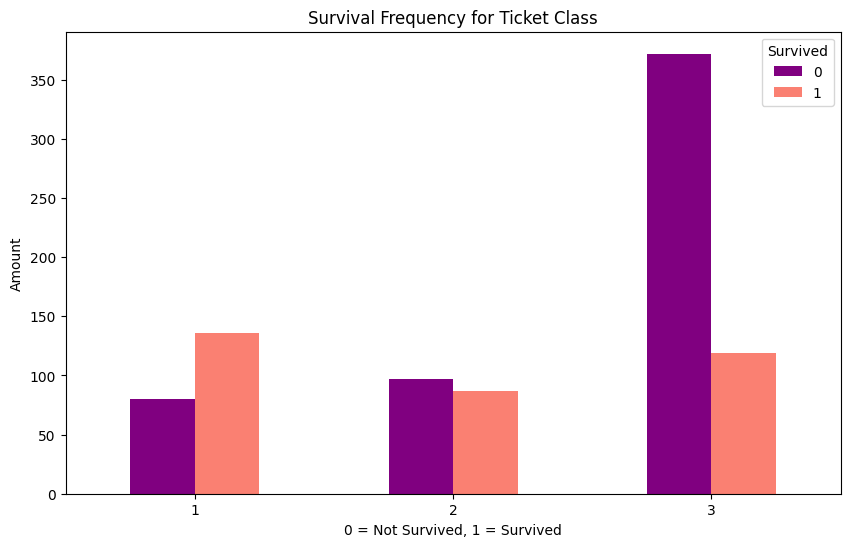

In [531]:
# Visualize the crosstab dataframe
pd.crosstab(data.Pclass, data.Survived).plot(kind="bar", 
                                    figsize=(10,6), 
                                    color=["purple","salmon"]);
plt.title("Survival Frequency for Ticket Class")
plt.xlabel("0 = Not Survived, 1 = Survived")
plt.ylabel("Amount")
plt.xticks(rotation=0);

The Chart confirms `1st class` more likely survivied than other classes
The Chart confirms` 3rd clas`s more likely iead than other classes

In [532]:
pd.crosstab(data.SibSp,data.Survived)

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


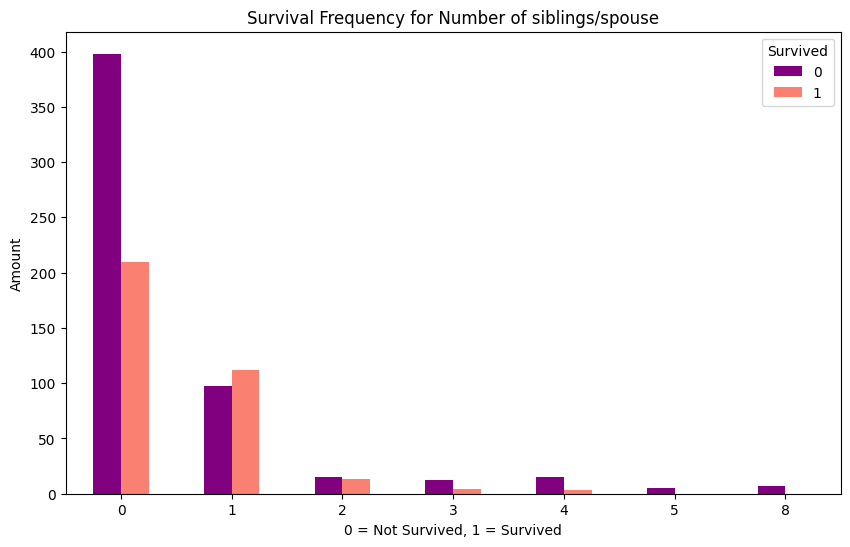

In [533]:
# Visualize the crosstab dataframe
pd.crosstab(data.SibSp, data.Survived).plot(kind="bar", 
                                    figsize=(10,6), 
                                    color=["purple","salmon"]);
plt.title("Survival Frequency for Number of siblings/spouse")
plt.xlabel("0 = Not Survived, 1 = Survived")
plt.ylabel("Amount")
plt.xticks(rotation=0);

The Chart confirms that a person aboarded without siblings or spouse is more likely doed.

In [534]:
pd.crosstab(data.Parch,data.Survived)

Survived,0,1
Parch,,
0,445,233
1,53,65
2,40,40
3,2,3
4,4,0
5,4,1
6,1,0


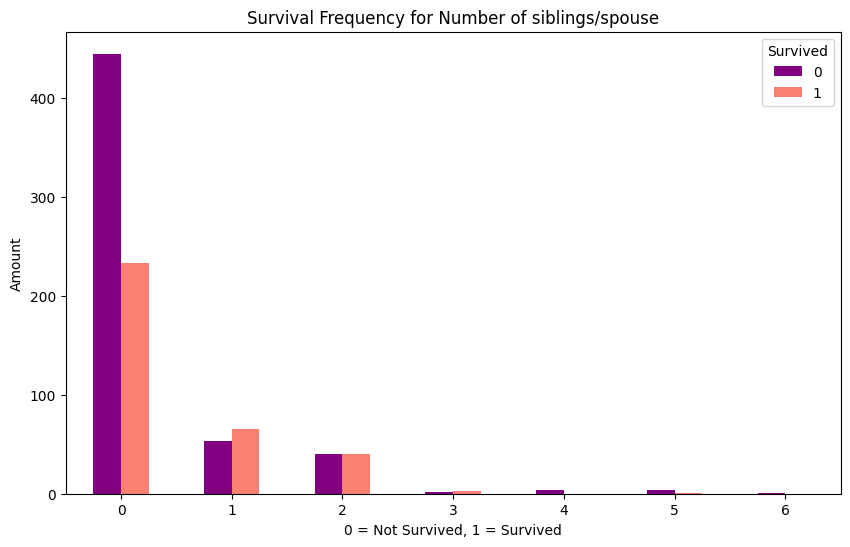

In [535]:
# Visualize the crosstab dataframe
pd.crosstab(data.Parch, data.Survived).plot(kind="bar", 
                                    figsize=(10,6), 
                                    color=["purple","salmon"]);
plt.title("Survival Frequency for Number of siblings/spouse")
plt.xlabel("0 = Not Survived, 1 = Survived")
plt.ylabel("Amount")
plt.xticks(rotation=0);

The Chart confirms that a person aboarded alone is more likely dead

In [536]:
pd.crosstab(data.Embarked,data.Survived)

Survived,0,1
Embarked,,
C,75,93
Q,47,30
S,427,217


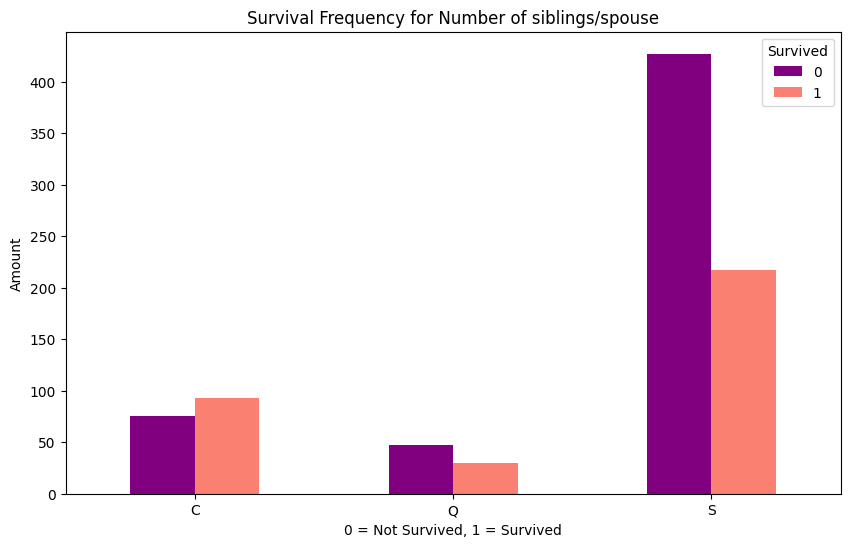

In [537]:
# Visualize the crosstab dataframe
pd.crosstab(data.Embarked, data.Survived).plot(kind="bar", 
                                    figsize=(10,6), 
                                    color=["purple","salmon"]);
plt.title("Survival Frequency for Number of siblings/spouse")
plt.xlabel("0 = Not Survived, 1 = Survived")
plt.ylabel("Amount")
plt.xticks(rotation=0);

C:\Users\SAINY\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


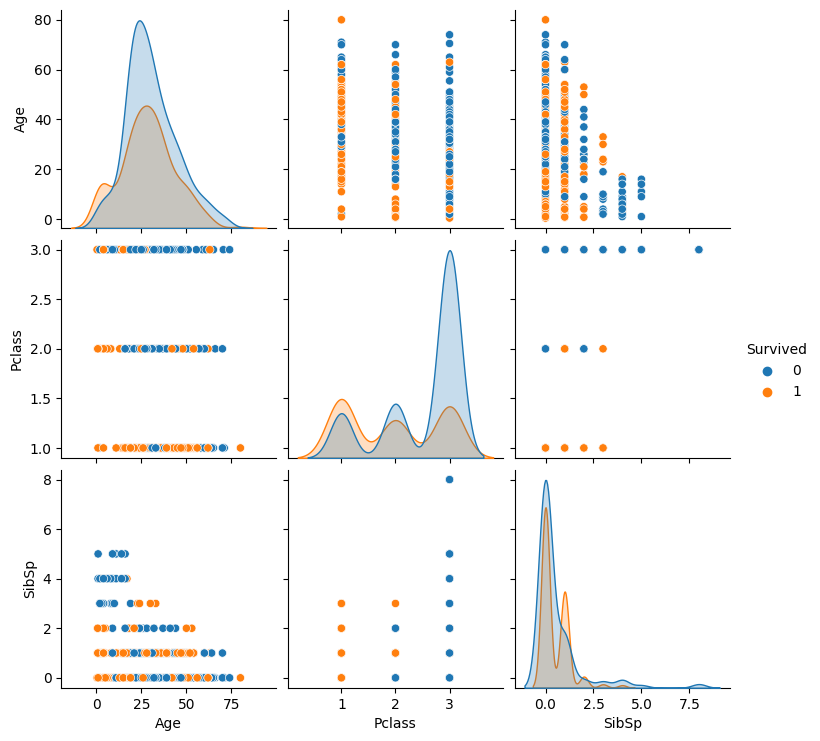

In [538]:
sns.pairplot(data = data, hue = 'Survived', vars = ['Age','Pclass','SibSp']);

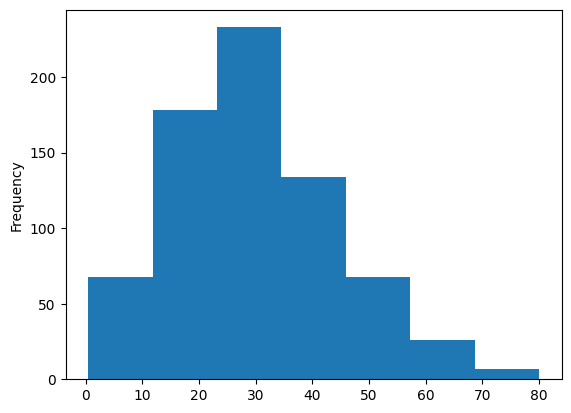

In [539]:
data.Age.plot.hist(bins=7);

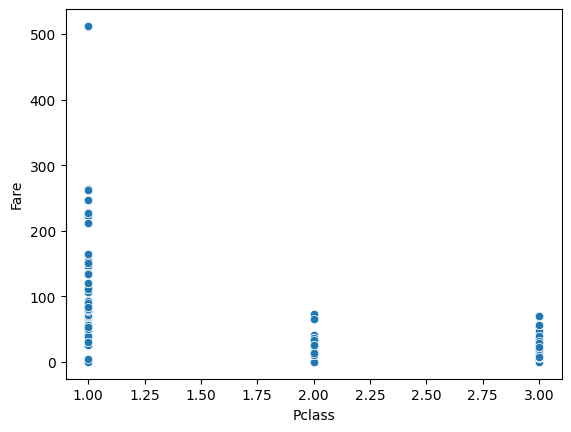

In [540]:
sns.scatterplot(x = 'Pclass', y = 'Fare', data = data );


Pclass 1 corresponds to higher fares while Pclass 2 and 3 coressponds to lower fares

# Feature Engineering

## Processing Titless

Additional information about the social status by simply parsing the name and extracting the title and converting to a binary variable.

In [541]:
titles = set()
for name in data['Name']:
    titles.add(name.split(',')[1].split('.')[0].strip())
print(titles)    

{'Master', 'Dr', 'Lady', 'Miss', 'Mrs', 'Ms', 'Mlle', 'Rev', 'Col', 'Capt', 'Sir', 'Mr', 'Mme', 'the Countess', 'Jonkheer', 'Major', 'Don'}


In [542]:
Title_Dictionary = {
    "Capt": "Officer",
    "Col": "Officer",
    "Major": "Officer",
    "Jonkheer": "Royalty",
    "Don": "Royalty",
    "Sir" : "Royalty",
    "Dr": "Officer",
    "Rev": "Officer",
    "the Countess":"Royalty",
    "Mme": "Mrs",
    "Mlle": "Miss",
    "Ms": "Mrs",
    "Mr" : "Mr",
    "Mrs" : "Mrs",
    "Miss" : "Miss",
    "Master" : "Master",
    "Lady" : "Royalty"
}
 
def get_titles(data):
    data['Title'] = data['Name'].map(lambda name:name.split(',')[1].split('.')[0].strip())
    data['Title'] = data.Title.map(Title_Dictionary)
    return data

This function will parse the name and extract the titles.

In [543]:
data = get_titles(data)

In [544]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [545]:
pd.crosstab(data.Survived,data.Title)

Title,Master,Miss,Mr,Mrs,Officer,Royalty
Survived,,,,,,
0,17,55,436,26,13,2
1,23,129,81,101,5,3


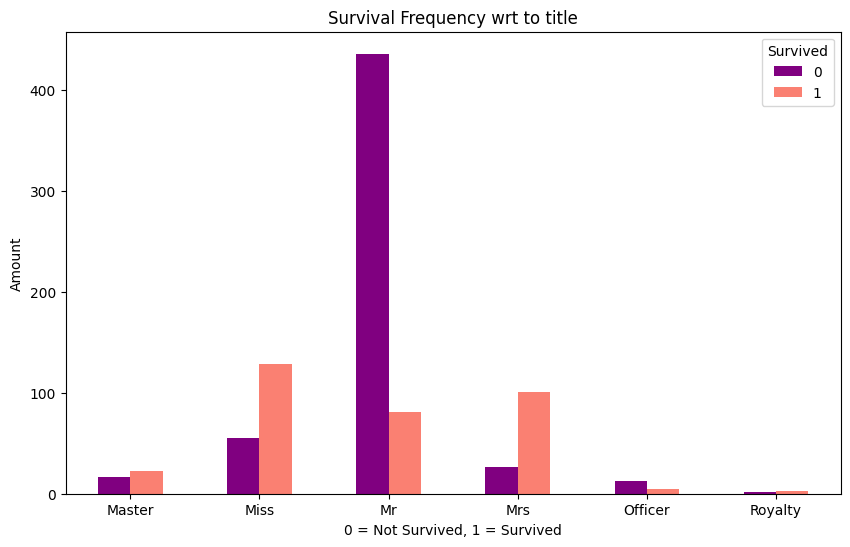

In [546]:
# Visualize the crosstab dataframe
pd.crosstab(data.Title, data.Survived).plot(kind="bar", 
                                    figsize=(10,6), 
                                    color=["purple","salmon"]);
plt.title("Survival Frequency wrt to title")
plt.xlabel("0 = Not Survived, 1 = Survived")
plt.ylabel("Amount")
plt.xticks(rotation=0);

## Processing Age

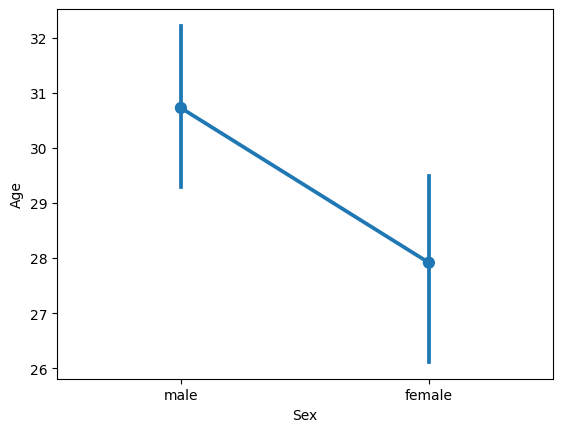

In [547]:
sns.pointplot(x = 'Sex', y = 'Age', data = data);

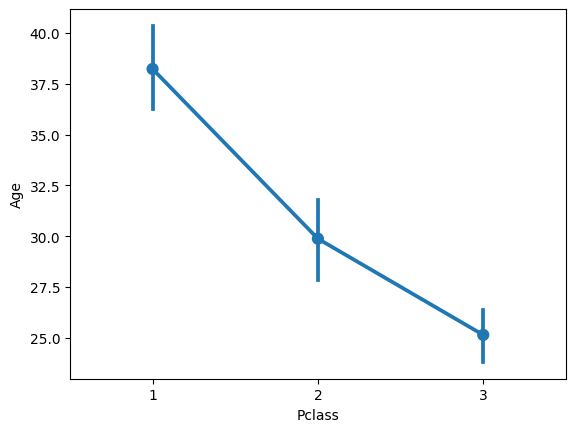

In [548]:
sns.pointplot(x = 'Pclass', y = 'Age', data = data);

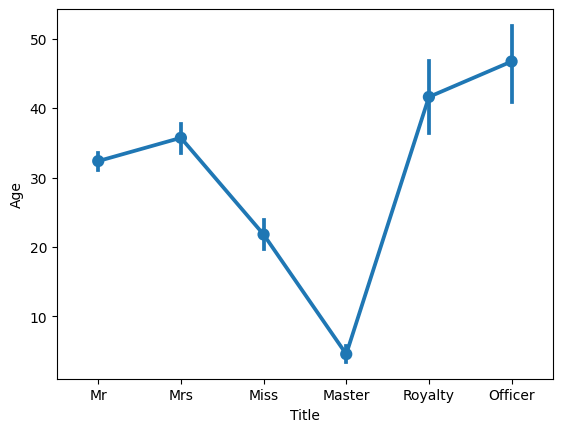

In [549]:
sns.pointplot(x = 'Title', y = 'Age', data = data);

In [550]:
data['Title'] = data['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

# Group by 'Pclass', 'Title', and 'Sex' to calculate the median age
grouped_median_train = data.groupby(['Pclass', 'Title', 'Sex'])['Age'].median().reset_index()
grouped_median_train.columns = ['Pclass', 'Title', 'Sex', 'Median_Age']
grouped_median_train

,Pclass,Title,Sex,Median_Age
0,1,Capt,male,70.0
1,1,Col,male,58.0
2,1,Countess,female,33.0
3,1,Don,male,40.0
4,1,Dr,female,49.0
5,1,Dr,male,44.0
6,1,Jonkheer,male,38.0
7,1,Lady,female,48.0
8,1,Major,male,48.5
9,1,Master,male,4.0


In [551]:
def fill_age(row):
    condition = (
        (grouped_median_train['Sex'] == row['Sex']) & 
        (grouped_median_train['Title'] == row['Title']) & 
        (grouped_median_train['Pclass'] == row['Pclass'])
    ) 
    return grouped_median_train[condition]['Age'].values[0]


def process_age():
    global data
    data['Age'] = data.apply(lambda row: fill_age(row) if np.isnan(row['Age']) else row['Age'], axis=1)
    return data

In [552]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [553]:
data["Age"].isna().sum()

177

## Processing Cabin

In [554]:
 def process_cabin():
    global data    
    data.Cabin.fillna('U', inplace=True)
    data['Cabin'] = data['Cabin'].map(lambda c: c[0])
    cabin_dummies = pd.get_dummies(data['Cabin'], prefix='Cabin')    
    data = pd.concat([data, cabin_dummies], axis=1)
    data.drop('Cabin', axis=1, inplace=True)
    return data

In [555]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            0
dtype: int64

In [556]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


## Processing Family
This new variable creation is based on the assumption that large families tend to stay together, which increases their likelihood of being rescued compared to individuals traveling alone.

In [557]:
data['Family_Size'] = data['Parch'] + data['SibSp'] + 1
data['Alone'] = data['Family_Size'].map(lambda c : 1 if c==1 else 0 )
data['Not_Alone'] = data['Family_Size'].map(lambda c : 1 if c > 1 else 0 ) 

In [558]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Family_Size,Alone,Not_Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,2,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2,0,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,2,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,1,1,0


In [559]:
pd.crosstab(data.Survived,data.Family_Size)

Family_Size,1,2,3,4,5,6,7,8,11
Survived,,,,,,,,,
0,374,72,43,8,12,19,8,6,7
1,163,89,59,21,3,3,4,0,0


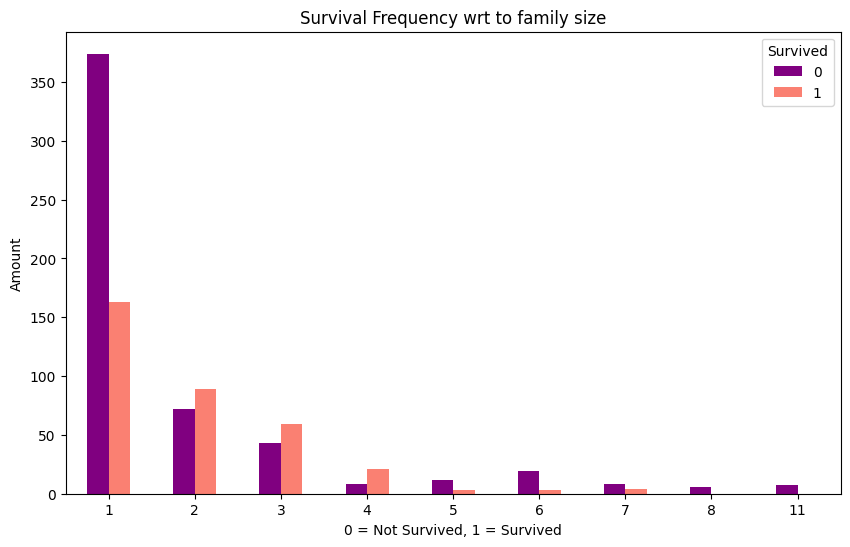

In [560]:
# Visualize the crosstab dataframe
pd.crosstab(data.Family_Size, data.Survived).plot(kind="bar", 
                                    figsize=(10,6), 
                                    color=["purple","salmon"]);
plt.title("Survival Frequency wrt to family size")
plt.xlabel("0 = Not Survived, 1 = Survived")
plt.ylabel("Amount")
plt.xticks(rotation=0);

# Binning Age
Now we need to convert the age feature. First we will convert it from float into integer. Then we will create the new Age variable, by categorizing every age into a group. Note that it is important on how you form these groups, since you don’t want, for example, that 80% of your data falls into group 1.

In [561]:
d = [data]
for dataset in d:
    median_age = dataset['Age'].median()
    dataset['Age'].fillna(median_age, inplace=True)
    dataset['Age'] = dataset['Age'].astype(int)
    dataset.loc[ dataset['Age'] <= 11, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 11) & (dataset['Age'] <= 18), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 22), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 22) & (dataset['Age'] <= 27), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 27) & (dataset['Age'] <= 33), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 33) & (dataset['Age'] <= 40), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 66), 'Age'] = 6
    dataset.loc[ dataset['Age'] > 66, 'Age'] = 6


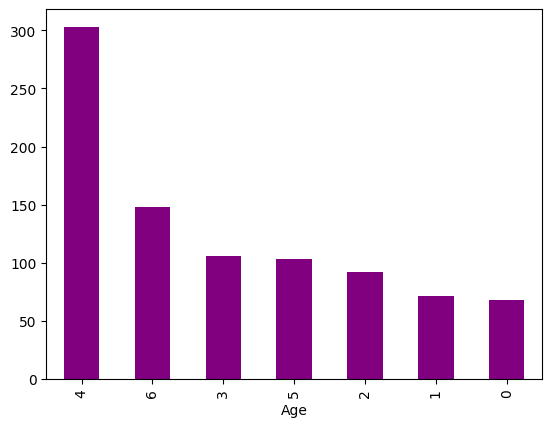

In [562]:
data['Age'].value_counts().plot(kind = 'bar',color=["purple"]);

# Processing Fare

In [563]:
data['Fare'].astype(int)
da = [data]
for dataset in da:
    dataset['Fare'] = dataset['Fare'].astype(int)
    dataset.loc[ dataset['Fare'] == 6, 'Fare'] = 0
    dataset.loc[ dataset['Fare'] == 7, 'Fare'] = 0
    dataset.loc[ dataset['Fare'] == 5, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7) & (dataset['Fare'] <= 10), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 10) & (dataset['Fare'] <= 20), 'Fare'] = 2
    dataset.loc[(dataset['Fare'] > 20) & (dataset['Fare'] <= 30), 'Fare'] = 3
    dataset.loc[(dataset['Fare'] > 30) & (dataset['Fare'] <= 70), 'Fare'] = 4
    dataset.loc[(dataset['Fare'] > 70), 'Fare'] = 5
    

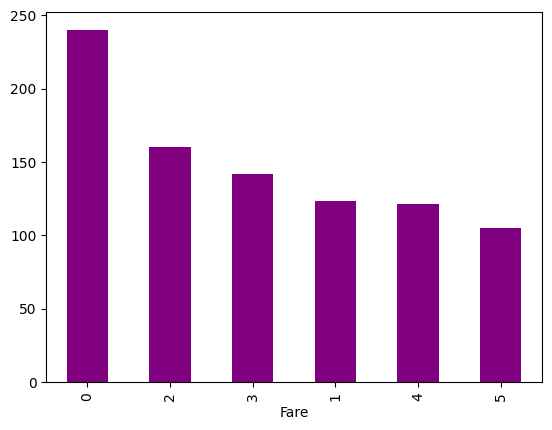

In [564]:
data['Fare'].value_counts().plot(kind = 'bar',color=["purple"]);

Dropping the ticket column since it is not used

In [565]:
data.drop(['Ticket'], axis = 1, inplace = True)

In [566]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title,Family_Size,Alone,Not_Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,2,1,0,0,NaN,S,Mr,2,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,5,1,0,5,C85,C,Mrs,2,0,1
2,3,1,3,"Heikkinen, Miss. Laina",female,3,0,0,0,NaN,S,Miss,1,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,5,1,0,4,C123,S,Mrs,2,0,1
4,5,0,3,"Allen, Mr. William Henry",male,5,0,0,1,NaN,S,Mr,1,1,0


Embarked has two missing values. Let's fill those with modal value which is Southampton (S)

In [567]:
data['Embarked'] = data['Embarked'].fillna('S')

In [568]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Fare             0
Cabin          687
Embarked         0
Title            0
Family_Size      0
Alone            0
Not_Alone        0
dtype: int64

# Encoding categorical variables

In [569]:
x = pd.get_dummies(train_df['Sex'],drop_first = True)
data = pd.concat([data,x],axis = 1)
data = pd.concat([data, pd.get_dummies(data['Title'], prefix = 'Title')],axis = 1)
data = pd.concat([data, pd.get_dummies(data['Embarked'], prefix = 'Embarked')],axis = 1)

In [570]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,...,Title_Mlle,Title_Mme,Title_Mr,Title_Mrs,Title_Ms,Title_Rev,Title_Sir,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,2,1,0,0,NaN,...,False,False,True,False,False,False,False,False,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,5,1,0,5,C85,...,False,False,False,True,False,False,False,True,False,False
2,3,1,3,"Heikkinen, Miss. Laina",female,3,0,0,0,NaN,...,False,False,False,False,False,False,False,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,5,1,0,4,C123,...,False,False,False,True,False,False,False,False,False,True
4,5,0,3,"Allen, Mr. William Henry",male,5,0,0,1,NaN,...,False,False,True,False,False,False,False,False,False,True


# Dropping useless features

In [571]:
# List of columns to drop
columns_to_drop = ['Embarked_C', 'Title_Royalty', 'Cabin_T', 'Sex', 'Name', 'PassengerId', 'Embarked', 'Title']

# Drop columns only if they exist in the DataFrame
data = data.drop(columns=[col for col in columns_to_drop if col in data.columns])

# Verify the remaining columns
print(data.columns)

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin',
       'Family_Size', 'Alone', 'Not_Alone', 'male', 'Title_Capt', 'Title_Col',
       'Title_Countess', 'Title_Don', 'Title_Dr', 'Title_Jonkheer',
       'Title_Lady', 'Title_Major', 'Title_Master', 'Title_Miss', 'Title_Mlle',
       'Title_Mme', 'Title_Mr', 'Title_Mrs', 'Title_Ms', 'Title_Rev',
       'Title_Sir', 'Embarked_Q', 'Embarked_S'],
      dtype='object')


In [572]:
data.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin',
       'Family_Size', 'Alone', 'Not_Alone', 'male', 'Title_Capt', 'Title_Col',
       'Title_Countess', 'Title_Don', 'Title_Dr', 'Title_Jonkheer',
       'Title_Lady', 'Title_Major', 'Title_Master', 'Title_Miss', 'Title_Mlle',
       'Title_Mme', 'Title_Mr', 'Title_Mrs', 'Title_Ms', 'Title_Rev',
       'Title_Sir', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [573]:
# Assuming 'data' is your DataFrame and you want to exclude non-numeric columns
numeric_columns = data.select_dtypes(include=[np.number])  # Select numeric columns
corr_matrix = numeric_columns.corr()  # Compute correlation matrix
corr_matrix

,Survived,Pclass,Age,SibSp,Parch,Fare,Family_Size,Alone,Not_Alone
Survived,1.000000,-0.338481,-0.064091,-0.035322,0.081629,0.317734,0.016639,-0.203367,0.203367
Pclass,-0.338481,1.000000,-0.293455,0.083081,0.018443,-0.720986,0.065997,0.135207,-0.135207
Age,-0.064091,-0.293455,1.000000,-0.238989,-0.200712,0.074909,-0.263613,0.191849,-0.191849
SibSp,-0.035322,0.083081,-0.238989,1.000000,0.414838,0.346906,0.890712,-0.584471,0.584471
Parch,0.081629,0.018443,-0.200712,0.414838,1.000000,0.361827,0.783111,-0.583398,0.583398
Fare,0.317734,-0.720986,0.074909,0.346906,0.361827,1.000000,0.417861,-0.520436,0.520436
Family_Size,0.016639,0.065997,-0.263613,0.890712,0.783111,0.417861,1.000000,-0.690922,0.690922
Alone,-0.203367,0.135207,0.191849,-0.584471,-0.583398,-0.520436,-0.690922,1.000000,-1.000000
Not_Alone,0.203367,-0.135207,-0.191849,0.584471,0.583398,0.520436,0.690922,-1.000000,1.000000


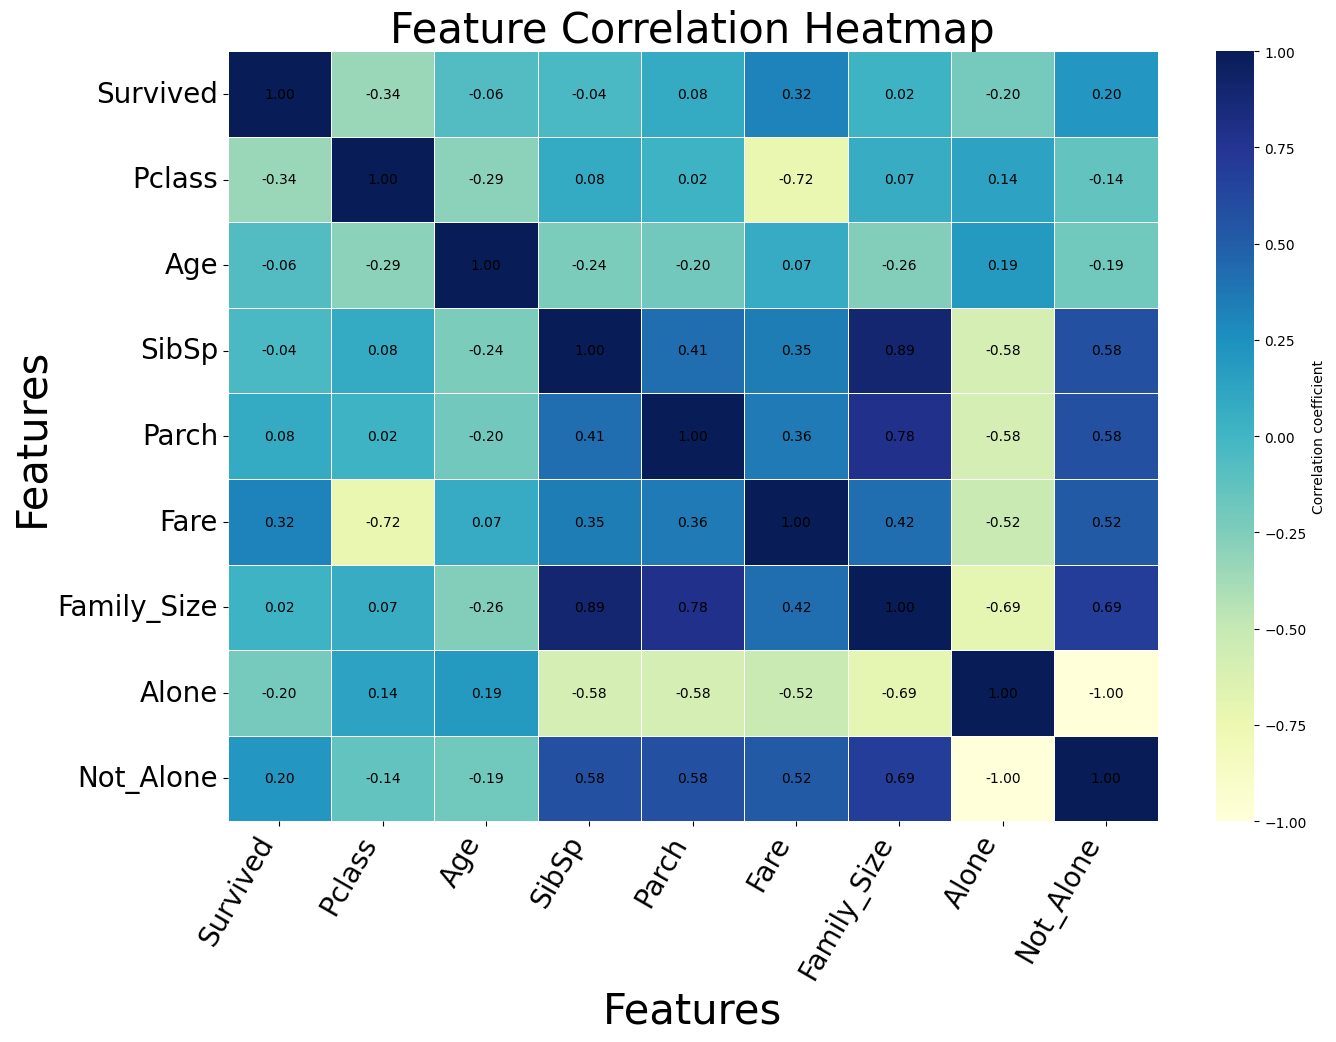

In [574]:
fig,ax=plt.subplots(figsize=(15,10))
sns.heatmap(
    corr_matrix, 
    annot=True, 
    linewidths=0.5, 
    fmt=".2f", 
    cmap="YlGnBu", 
    annot_kws={"size": 10,"color":"black"},  # Increase annotation font size
    cbar_kws={'label': 'Correlation coefficient'}  # Add color bar label
)

# Rotate x-axis labels for better readability
plt.xticks(rotation=60, ha='right',fontsize=20)
plt.yticks(rotation=0, ha='right',fontsize=20)
# Add title and labels
plt.title('Feature Correlation Heatmap', fontsize=30)
plt.xlabel('Features', fontsize=30)
plt.ylabel('Features', fontsize=30)

# Show the heatmap
plt.show()

In [575]:
data=data.drop(columns=["Cabin"])

In [578]:
data = data.fillna(False).astype(int)

# Modelling

In [579]:
X=data.drop("Survived",axis=1)
y=data.Survived.values

In [580]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,Family_Size,Alone,Not_Alone,male,Title_Capt,...,Title_Miss,Title_Mlle,Title_Mme,Title_Mr,Title_Mrs,Title_Ms,Title_Rev,Title_Sir,Embarked_Q,Embarked_S
0,3,2,1,0,0,2,0,1,1,0,...,0,0,0,1,0,0,0,0,0,1
1,1,5,1,0,5,2,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,3,3,0,0,0,1,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,1,5,1,0,4,2,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
4,3,5,0,0,1,1,1,0,1,0,...,0,0,0,1,0,0,0,0,0,1


In [581]:
y

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

# Splitting data into train and test set

In [582]:
np.random.seed(42)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [583]:
X_train.head()

,Pclass,Age,SibSp,Parch,Fare,Family_Size,Alone,Not_Alone,male,Title_Capt,...,Title_Miss,Title_Mlle,Title_Mme,Title_Mr,Title_Mrs,Title_Ms,Title_Rev,Title_Sir,Embarked_Q,Embarked_S
331,1,6,0,0,3,1,1,0,1,0,...,0,0,0,1,0,0,0,0,0,1
733,2,3,0,0,2,1,1,0,1,0,...,0,0,0,1,0,0,0,0,0,1
382,3,4,0,0,0,1,1,0,1,0,...,0,0,0,1,0,0,0,0,0,1
704,3,3,1,0,0,2,0,1,1,0,...,0,0,0,1,0,0,0,0,0,1
813,3,0,4,2,4,7,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1


In [584]:
y_train,len(y_train)

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
        1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
        1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
        1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
        0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,
        0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
        1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
        1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
        0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
        1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 

In [585]:
X_test.head()

,Pclass,Age,SibSp,Parch,Fare,Family_Size,Alone,Not_Alone,male,Title_Capt,...,Title_Miss,Title_Mlle,Title_Mme,Title_Mr,Title_Mrs,Title_Ms,Title_Rev,Title_Sir,Embarked_Q,Embarked_S
709,3,4,1,1,2,3,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
439,2,4,0,0,1,1,1,0,1,0,...,0,0,0,1,0,0,0,0,0,1
840,3,2,0,0,0,1,1,0,1,0,...,0,0,0,1,0,0,0,0,0,1
720,2,0,0,1,4,2,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
39,3,1,1,0,2,2,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0


In [586]:
y_test,len(y_test)

(array([1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
        1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
        0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
        0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
        1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
        0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
        0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
        1, 1, 1]),
 179)

# Lets make a model

In [587]:
# Put models in a dictionary
models = {"KNN": KNeighborsClassifier(),
          "Logistic Regression": LogisticRegression(),
          "Random Forest": RandomForestClassifier(),
          "svc":SVC(kernel='sigmoid', gamma=1.0),
          "knc": KNeighborsClassifier(),
          "mnb": MultinomialNB(),
          "dtc": DecisionTreeClassifier(max_depth=5),
          "lrc": LogisticRegression(solver='liblinear', penalty='l1'),
          "rfc": RandomForestClassifier(n_estimators=50, random_state=2),
          "abc": AdaBoostClassifier(n_estimators=50, random_state=2),
          "bc": BaggingClassifier(n_estimators=50, random_state=2),
          "etc": ExtraTreesClassifier(n_estimators=50, random_state=2),
          "gbdt": GradientBoostingClassifier(n_estimators=50,random_state=2),
          "xgb": XGBClassifier(n_estimators=50,random_state=2)}

# Create function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    np.random.seed(42)
    # Make a list to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [588]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)
model_scores

C:\Users\SAINY\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\SAINY\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


{'KNN': 0.7877094972067039,
 'Logistic Regression': 0.8268156424581006,
 'Random Forest': 0.8379888268156425,
 'svc': 0.5865921787709497,
 'knc': 0.7877094972067039,
 'mnb': 0.770949720670391,
 'dtc': 0.8491620111731844,
 'lrc': 0.8100558659217877,
 'rfc': 0.8435754189944135,
 'abc': 0.8100558659217877,
 'bc': 0.8435754189944135,
 'etc': 0.8100558659217877,
 'gbdt': 0.8156424581005587,
 'xgb': 0.8491620111731844}

In [589]:
#visualizing
pd.DataFrame(model_scores.items())

,0,1
0,KNN,0.787709
1,Logistic Regression,0.826816
2,Random Forest,0.837989
3,svc,0.586592
4,knc,0.787709
5,mnb,0.770950
6,dtc,0.849162
7,lrc,0.810056
8,rfc,0.843575
9,abc,0.810056


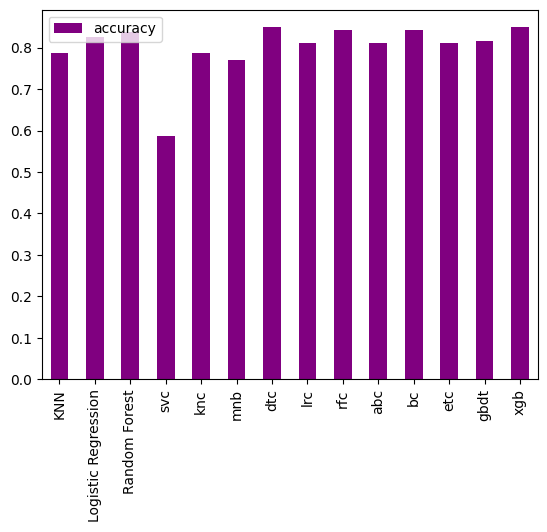

In [590]:
#visualizing
model_compare = pd.DataFrame(model_scores, index=['accuracy'])
model_compare.T.plot.bar(color="purple");

# Tune KNeighborsClassifier (K-Nearest Neighbors or KNN) by hand

In [591]:
# Create a list of train scores
train_scores = []

# Create a list of test scores
test_scores = []

# Create a list of different values for n_neighbors
neighbors = range(1, 21) # 1 to 20

# Setup algorithm
knn = KNeighborsClassifier()

# Loop through different neighbors values
for i in neighbors:
    knn.set_params(n_neighbors = i) # set neighbors value
    
    # Fit the algorithm
    knn.fit(X_train, y_train)
    
    # Update the training scores
    train_scores.append(knn.score(X_train, y_train))
    
    # Update the test scores
    test_scores.append(knn.score(X_test, y_test))

In [592]:
test_scores

[0.8044692737430168,
 0.7877094972067039,
 0.8324022346368715,
 0.8100558659217877,
 0.7877094972067039,
 0.8044692737430168,
 0.8156424581005587,
 0.7821229050279329,
 0.8044692737430168,
 0.8100558659217877,
 0.8268156424581006,
 0.8100558659217877,
 0.8044692737430168,
 0.8100558659217877,
 0.8100558659217877,
 0.8100558659217877,
 0.7932960893854749,
 0.776536312849162,
 0.770949720670391,
 0.770949720670391]

In [593]:
train_scores

[0.8862359550561798,
 0.8469101123595506,
 0.8679775280898876,
 0.848314606741573,
 0.8384831460674157,
 0.8328651685393258,
 0.8441011235955056,
 0.8356741573033708,
 0.8300561797752809,
 0.8370786516853933,
 0.8356741573033708,
 0.827247191011236,
 0.824438202247191,
 0.8216292134831461,
 0.827247191011236,
 0.8160112359550562,
 0.8188202247191011,
 0.797752808988764,
 0.8019662921348315,
 0.7921348314606742]

Maximum KNN score on the test data: 83.24%


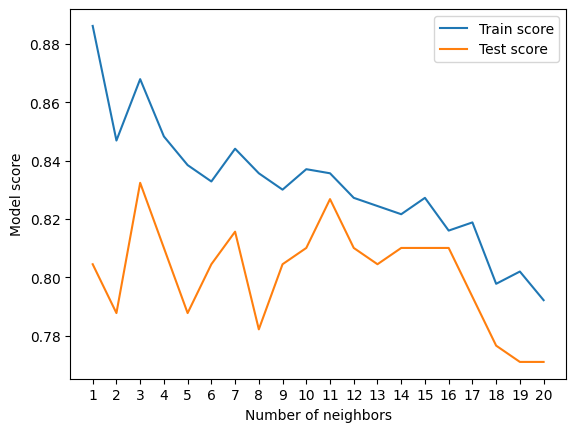

In [594]:
# Plotting the above scores

plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")


Confusion Matrix:
[[92 13]
 [22 52]]


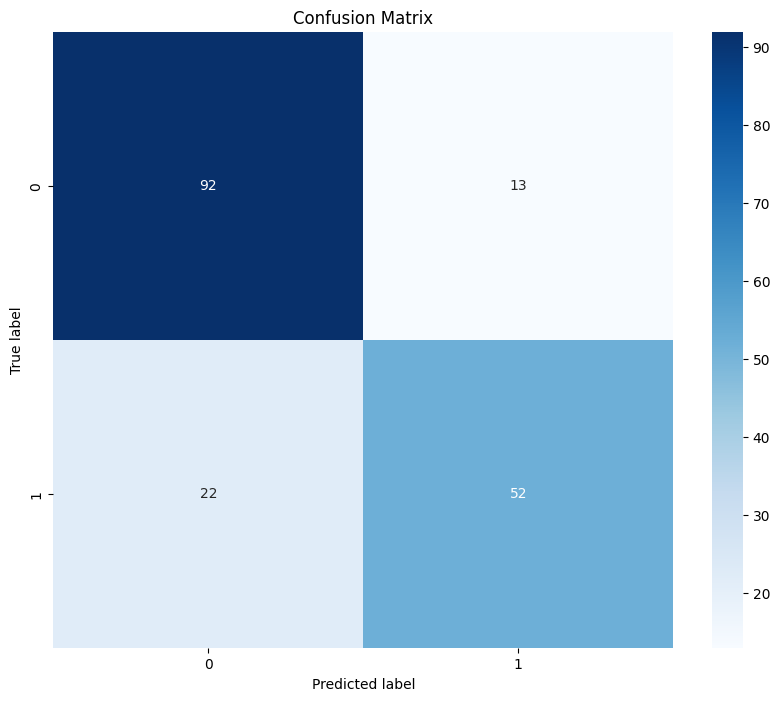

In [613]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

# Create heatmap of confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

## KNN score increased to 83.24%

Fitting 5 folds for each of 48 candidates, totalling 240 fits


C:\Users\SAINY\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [12 14 25] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\SAINY\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


Best parameters: {'svm__C': 1, 'svm__gamma': 'scale', 'svm__kernel': 'rbf'}
Best cross-validation score: 0.8159952723333005

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.88      0.84       105
           1       0.80      0.70      0.75        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179


Confusion Matrix:
[[92 13]
 [22 52]]


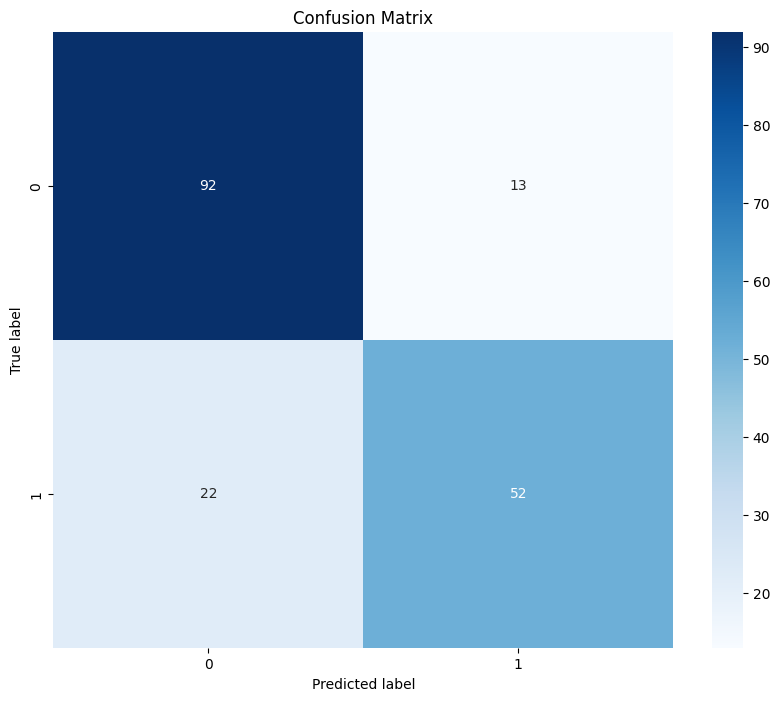

In [612]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('feature_selection', SelectKBest(f_classif, k=10)),
    ('svm', svm.SVC(random_state=42))
])

# Define parameter grid for GridSearchCV
param_grid = {
    'svm__C': [0.1, 1, 10, 100],
    'svm__gamma': ['scale', 'auto', 0.1, 1],
    'svm__kernel': ['rbf', 'poly', 'sigmoid']
}

# Perform GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# Print best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

# Evaluate on test set
y_pred = grid_search.predict(X_test)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

# Create heatmap of confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

## SVC score increased to 81.59%

Fitting 5 folds for each of 729 candidates, totalling 3645 fits


C:\Users\SAINY\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [12 14 25] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\SAINY\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


Best parameters: {'xgb__colsample_bytree': 0.7, 'xgb__learning_rate': 0.01, 'xgb__max_depth': 5, 'xgb__min_child_weight': 3, 'xgb__n_estimators': 300, 'xgb__subsample': 0.9}
Best cross-validation score: 0.8356741849699596

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       105
           1       0.78      0.73      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179


Confusion Matrix:
[[90 15]
 [20 54]]


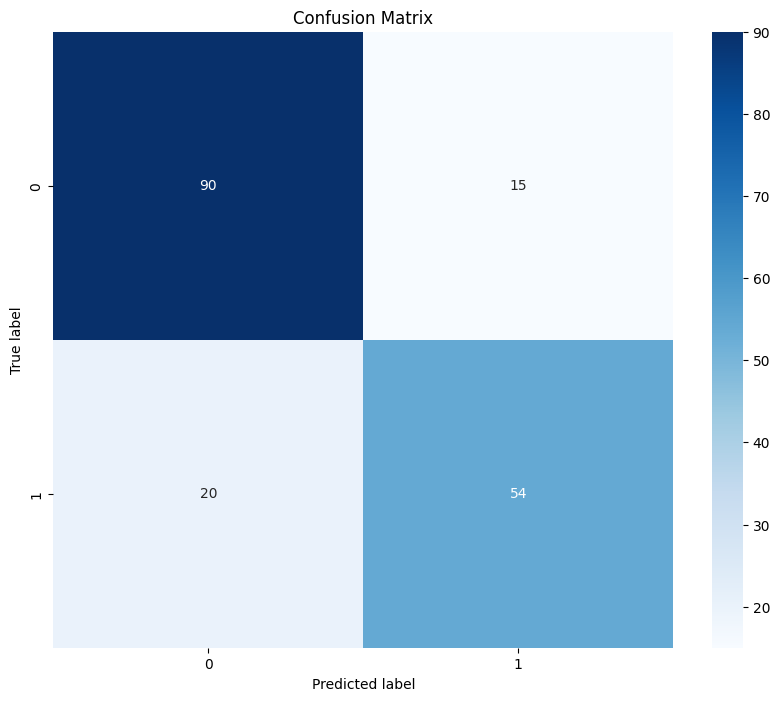

In [611]:
# Create a pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('feature_selection', SelectKBest(f_classif, k=10)),
    ('xgb', xgb.XGBClassifier(random_state=42))
])

# Define parameter grid for GridSearchCV
param_grid = {
    'xgb__n_estimators': [100, 200, 300],
    'xgb__learning_rate': [0.01, 0.1, 0.3],
    'xgb__max_depth': [3, 5, 7],
    'xgb__min_child_weight': [1, 3, 5],
    'xgb__subsample': [0.7, 0.8, 0.9],
    'xgb__colsample_bytree': [0.7, 0.8, 0.9]
}

# Perform GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, verbose=1, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

# Evaluate on test set
y_pred = grid_search.predict(X_test)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

# Create heatmap of confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

### Hence we can Improve the Scores